In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
path = r'/Users/Luca2/Documents/Dropbox/Mein Mac (Air-von-Luca.fritz.box)/Desktop/Instacart Basket Analysis'

In [8]:
orders_all_included = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_included.pkl'))

# 5. Marketing and Business Strategy

### Profiling variable based on age

In [9]:
# Check age
orders_all_included.agg({'age': ['mean', 'min', 'max']})

,age
mean,49.468026
min,18.000000
max,81.000000


In [16]:
# Group customers into age groups
import numpy as np


conditions = [
    (orders_all_included['age'] >= 65),
    (orders_all_included['age'] < 65) & (orders_all_included['age'] >= 25),
    (orders_all_included['age'] < 25) & (orders_all_included['age'] >= 18),
    (orders_all_included['age'] < 18)]

labels = ['Elder', 'Adult', 'Young Adult', 'Child']

orders_all_included['age group'] = np.select(conditions, labels, default='Unknown')


In [17]:
# Check counts
orders_all_included['age group'].value_counts(dropna=False)

Adult          19353826
Elder           8195544
Young Adult     3415194
Name: age group, dtype: int64

In [18]:
19353826 + 8195544 +  3415194

30964564

### Profiling variable based on income

In [19]:
# Check income
orders_all_included.agg({'income': ['mean', 'min', 'max']})

,income
mean,99675.865108
min,25903.000000
max,593901.000000


#### The values that are one standard deviation away from the mean can be considered as average

In [22]:
bottom_avg_inc = orders_all_included['income'].mean()- orders_all_included['income'].std()
top_avg_inc = orders_all_included['income'].mean() + orders_all_included['income'].std()

In [23]:
# Value that is one standard deviation below the mean
bottom_avg_inc

56533.99958150181

In [24]:
# Value that is one standard deviation above the mean
top_avg_inc

142817.7306335918

In [27]:
orders_all_included.loc[orders_all_included['income'] >= 142818, 'income_range'] = 'Above average'
orders_all_included.loc[(orders_all_included['income'] < 142818) & (orders_all_included['income'] >= 56534), 'income_range'] = 'Average'
orders_all_included.loc[orders_all_included['income'] < 56534, 'income_range'] = 'Below average'

In [28]:
# Check counts
orders_all_included['income_range'].value_counts(dropna=False)

Average          20923960
Above average     5173082
Below average     4867522
Name: income_range, dtype: int64

In [29]:
20923960 +  5173082 + 4867522

30964564

### Profiling variable based on dependants

In [31]:
orders_all_included.loc[orders_all_included['dependants'] >0, 'Household'] = 'Children'
orders_all_included.loc[orders_all_included['dependants'] == 0, 'Household'] = 'No Children'

In [32]:
orders_all_included['Household'].value_counts(dropna=False)

Children       23224883
No Children     7739681
Name: Household, dtype: int64

In [33]:
23224883 + 7739681

30964564

## Characteristics of those profiles

## Family Profile

In [34]:
# Profile Tag for single with below average income and children

orders_all_included.loc[(orders_all_included['family_status'] != 'married') & (orders_all_included['income_range'] == 'Below average') & (orders_all_included['Household'] == 'Children'), 'Family Profile'] = 'Single with Below Avg Income and Children'

In [35]:
# Profile Tag for single with average income and children

orders_all_included.loc[(orders_all_included['family_status'] != 'married') & (orders_all_included['income_range'] == 'Average') & (orders_all_included['Household'] == 'Children'), 'Family Profile'] = 'Single with Avg Income and Children'

In [36]:
#  Profile Tag for single with above average income and children

orders_all_included.loc[(orders_all_included['family_status'] != 'married') & (orders_all_included['income_range'] == 'Above average') & (orders_all_included['Household'] == 'Children'), 'Family Profile'] = 'Single with Above Avg Income and Children'

In [37]:
# Profile Tag for single with below average income and no children

orders_all_included.loc[(orders_all_included['family_status'] != 'married') & (orders_all_included['income_range'] == 'Below average') & (orders_all_included['Household'] == 'No Children'), 'Family Profile'] = 'Single with Below Avg Income and no Children'

In [38]:
# Profile Tag for single with average income and no children

orders_all_included.loc[(orders_all_included['family_status'] != 'married') & (orders_all_included['income_range'] == 'Average') & (orders_all_included['Household'] == 'No Children'), 'Family Profile'] = 'Single with Avg Income and no Children'

In [39]:
# Profile Tag for single with above average income and no children
orders_all_included.loc[(orders_all_included['family_status'] != 'married') & (orders_all_included['income_range'] == 'Above average') & (orders_all_included['Household'] == 'No Children'), 'Family Profile'] = 'Single with Above Avg Income and no Children'

In [40]:
# Profile Tag for married with below average income and children

orders_all_included.loc[(orders_all_included['family_status'] == 'married') & (orders_all_included['income_range'] == 'Below average') & (orders_all_included['Household'] == 'Children'), 'Family Profile'] = 'Married with Below Avg Income and Children'

In [41]:
# Profile Tag for married with average income and children

orders_all_included.loc[(orders_all_included['family_status'] == 'married') & (orders_all_included['income_range'] == 'Average') & (orders_all_included['Household'] == 'Children'), 'Family Profile'] = 'Married with Avg Income and Children'

In [42]:
# Profile Tag for married with above average income and children 

orders_all_included.loc[(orders_all_included['family_status'] == 'married') & (orders_all_included['income_range'] == 'Above average') & (orders_all_included['Household'] == 'Children'), 'Family Profile'] = 'Married with Above Avg Income and Children'

In [43]:
# Profile Tag for married with below average income and no children 

orders_all_included.loc[(orders_all_included['family_status'] == 'married') & (orders_all_included['income_range'] == 'Below average') & (orders_all_included['Household'] == 'No Children'), 'Family Profile'] = 'Married with Below Avg Income and no Children'

In [44]:
# Profile Tag for married with average income and no children 

orders_all_included.loc[(orders_all_included['family_status'] == 'married') & (orders_all_included['income_range'] == 'Average') & (orders_all_included['Household'] == 'No Children'), 'Family Profile'] = 'Married with Avg Income and no Children'

In [45]:
# Profile Tag for married with above average income and no children 

orders_all_included.loc[(orders_all_included['family_status'] == 'married') & (orders_all_included['income_range'] == 'Above average') & (orders_all_included['Household'] == 'No Children'), 'Family Profile'] = 'Married with Above Avg Income and no Children'

In [47]:
orders_all_included['Family Profile'].value_counts(dropna = False)

Married with Avg Income and Children            14626870
Single with Avg Income and no Children           5209128
Married with Above Avg Income and Children       3843248
Married with Below Avg Income and Children       3273593
Single with Above Avg Income and no Children     1313889
Single with Below Avg Income and no Children     1216664
Single with Avg Income and Children              1087962
Single with Below Avg Income and Children         377265
Single with Above Avg Income and Children          15945
Name: Family Profile, dtype: int64

In [48]:
14626870 + 5209128 + 3843248 + 3273593 +1313889+1216664+1087962+ 377265+ 15945

30964564

[Text(0.5, 0, 'Number of Customers'),
 Text(0, 0.5, 'Customer Family Profile'),
 Text(0.5, 1.0, 'Family Profile Distribution')]

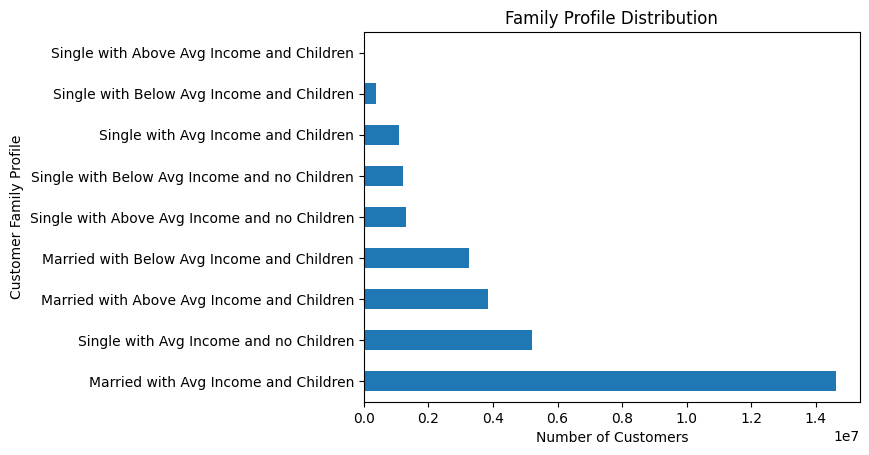

In [49]:
# Create a bar chart 

bar_family_profile = orders_all_included['Family Profile'].value_counts().plot.barh()



bar_family_profile.set(xlabel='Number of Customers', ylabel='Customer Family Profile', title='Family Profile Distribution')

In [52]:
# Export the bar chart to my files

bar_family_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_profile.png'))

# 7

In [80]:
# Family Profile Descriptive Statistics

orders_all_included.groupby('Family Profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                               mean  min   max
Family Profile                                                                
Married with Above Avg Income and Children                10.749270  0.0  30.0
Married with Avg Income and Children                      10.771824  0.0  30.0
Married with Below Avg Income and Children                11.125317  0.0  30.0
Single with Above Avg Income and Children                  8.994808  0.0  30.0
Single with Above Avg Income and no Children              10.655653  0.0  30.0
Single with Avg Income and Children                       10.694274  0.0  30.0
Single with Avg Income and no Children                    10.755871  0.0  30.0
Single with Below Avg Income and Children                 10.990935  0.0  30.0
Single with Below Avg Income and no Children              11.094831  0.0  30.0

[Text(0, 0.5, 'Average days since prior order')]

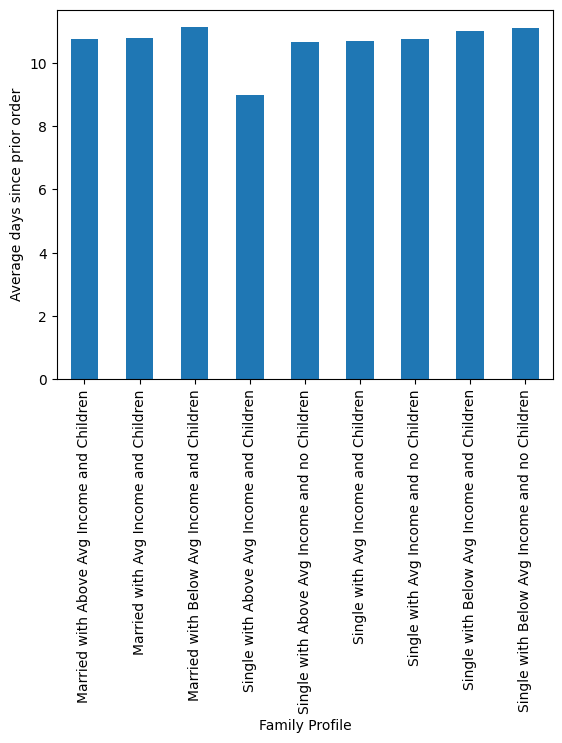

In [89]:
# Bar Chart 

bar_family_profile_mean_days = orders_all_included.groupby('Family Profile')['days_since_prior_order'].mean().plot.bar()

bar_family_profile_mean_days.set(ylabel='Average days since prior order')

In [92]:
# Export
bar_family_profile_mean_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_profile_mean_days.png'))

In [81]:
# Family Profile Descriptive Statistics

orders_all_included.groupby('Family Profile').agg({'hour_of_day_ordered': ['mean', 'min', 'max']})

hour_of_day_ordered        
                                                            mean min max
Family Profile                                                          
Married with Above Avg Income and Children             13.436868   0  23
Married with Avg Income and Children                   13.435000   0  23
Married with Below Avg Income and Children             13.253536   0  23
Single with Above Avg Income and Children              13.361994   0  23
Single with Above Avg Income and no Children           13.435933   0  23
Single with Avg Income and Children                    13.426790   0  23
Single with Avg Income and no Children                 13.461644   0  23
Single with Below Avg Income and Children              13.329392   0  23
Single with Below Avg Income and no Children           13.232025   0  23

[Text(0, 0.5, 'Average hour of order')]

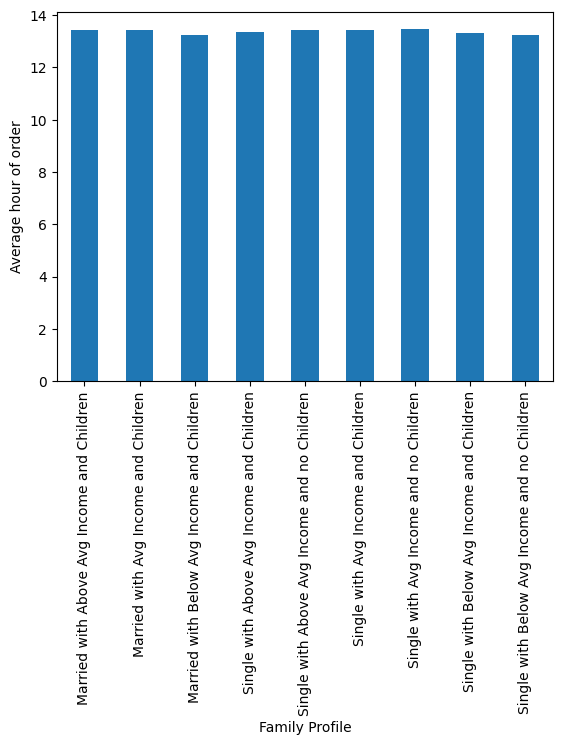

In [91]:
# Bar Chart 

bar_family_profile_mean_hours = orders_all_included.groupby('Family Profile')['hour_of_day_ordered'].mean().plot.bar()

bar_family_profile_mean_hours.set(ylabel='Average hour of order')

In [93]:
bar_family_profile_mean_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_profile_mean_hours.png'))

# 8 

In [95]:
# Create crosstab 

pivot_family_profile_region = pd.crosstab(orders_all_included['region'],orders_all_included['Family Profile'], dropna = False)


In [96]:
pivot_family_profile_region 

Family Profile,Married with Above Avg Income and Children,Married with Avg Income and Children,Married with Below Avg Income and Children,Single with Above Avg Income and Children,Single with Above Avg Income and no Children,Single with Avg Income and Children,Single with Avg Income and no Children,Single with Below Avg Income and Children,Single with Below Avg Income and no Children
region,,,,,,,,,
Midwest,917539,3409380,760343,3115,300731,260226,1253567,88094,268518
Northeast,679486,2604778,569509,774,229445,195730,901470,59926,223567
South,1257461,4852908,1113380,8334,437643,368086,1727917,129037,416373
West,988762,3759804,830361,3722,346070,263920,1326174,100208,308206


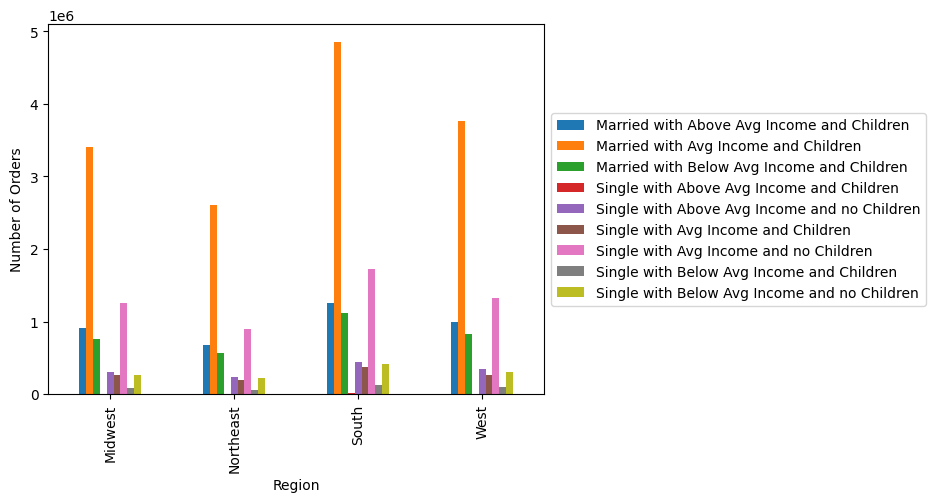

In [102]:
# Bar chart

bar_fam_profile_region = pivot_family_profile_region.plot.bar()

bar_fam_profile_region.set(ylabel= 'Number of Orders', xlabel= 'Region')
bar_fam_profile_region.legend(loc ='center left', bbox_to_anchor=(1,0.5))

In [136]:
# Export
bar_fam_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_profile_regions.png'))

In [97]:
# Create a crosstab 

pivot_family_profile_region_dept = pd.crosstab(orders_all_included['department_id'], orders_all_included['Family Profile'], dropna = False)


In [98]:
pivot_family_profile_region_dept

Family Profile,Married with Above Avg Income and Children,Married with Avg Income and Children,Married with Below Avg Income and Children,Single with Above Avg Income and Children,Single with Above Avg Income and no Children,Single with Avg Income and Children,Single with Avg Income and no Children,Single with Below Avg Income and Children,Single with Below Avg Income and no Children
department_id,,,,,,,,,
1,268797,1009837,210756,1582,92536,75132,358595,26279,78217
10,3649,15713,4456,2,1274,1233,5266,398,1460
11,52879,199878,45143,350,17845,14335,70438,5516,17922
12,91363,344222,40974,443,29532,25432,121036,6469,15310
13,227532,858588,166836,1038,78547,64165,303098,20642,62259
14,82035,303673,85512,380,27158,23200,107988,9618,31286
15,132642,495812,84123,672,44015,36527,175419,11278,31586
16,652019,2482191,498389,2923,222168,187335,881926,59949,190282
17,89548,323830,81772,666,31031,23504,110544,9179,29783


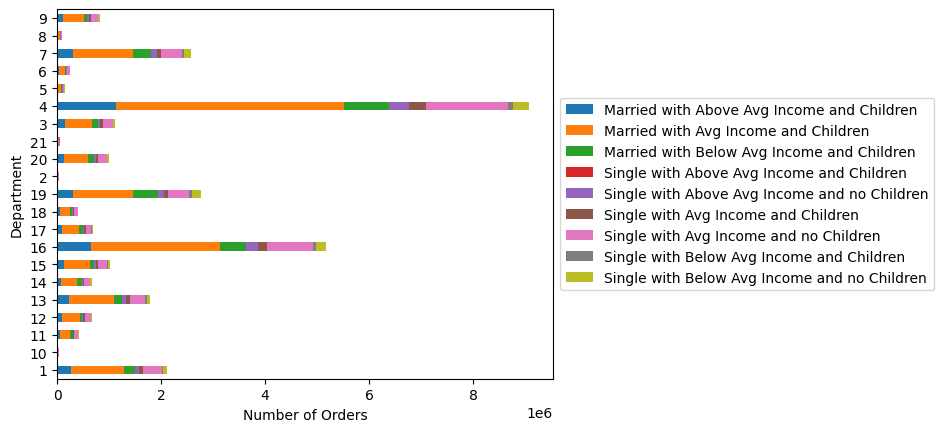

In [173]:
bar_fam_profile_dep = pivot_family_profile_region_dept.plot.barh(stacked=True)
bar_fam_profile_dep.set(xlabel='Number of Orders', ylabel='Department')
bar_fam_profile_dep.legend(loc ='center left', bbox_to_anchor=(1,0.5))

In [118]:
# Export
bar_fam_profile_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_profile_dep.png'))

#### Findings: There is no regional difference in the distribution of the Family Profile. There is also no difference in from what department the different family profiles bought. They are vastly difference in total size, but the distribution within those groups looks fairly the same.

# 9. Producing further visualizations

Text(0, 0.5, 'Average Days Since Prior Order')

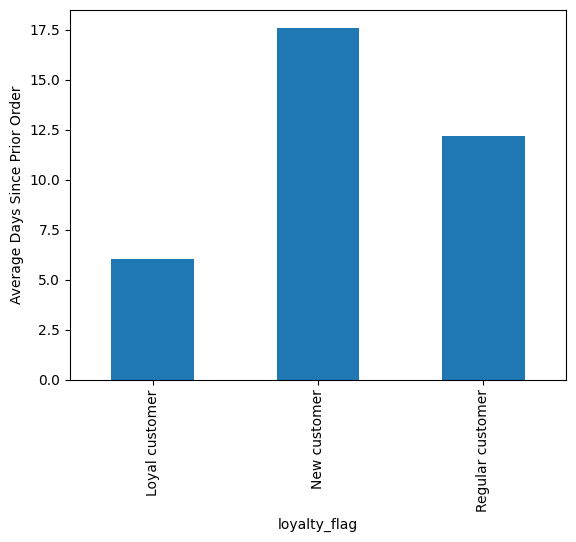

In [154]:
loyalty_mean_days = orders_all_included.groupby('loyalty_flag')['days_since_prior_order'].mean()
loyalty_mean_days.plot.bar()

loyalty_mean_days.plot.bar().set_xlabel('Loyalty Status')
loyalty_mean_days.plot.bar().set_ylabel('Average Days Since Prior Order')

In [133]:
print(loyalty_mean_days)

loyalty_flag
Loyal customer       6.026656
New customer        17.598690
Regular customer    12.155135
Name: days_since_prior_order, dtype: float32


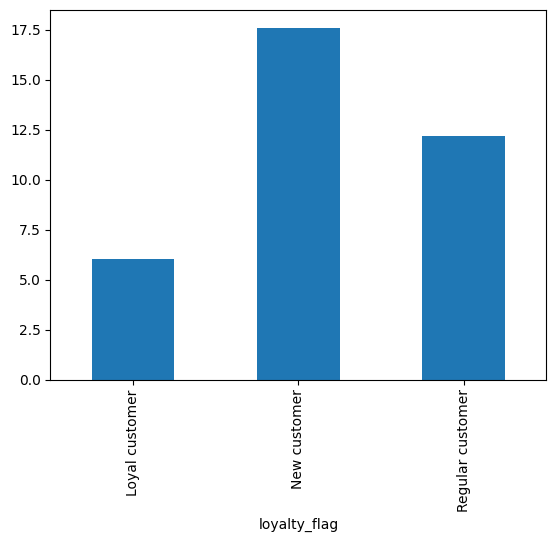

In [155]:
# Export
loyalty_mean_days.plot.bar().get_figure().savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_mean_days.png'))

In [170]:
#Export 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_number_by_day_and_loyalty.png'))

<Figure size 640x480 with 0 Axes>

In [191]:
loyalty_orders = orders_all_included.groupby(['orders_day_of_week', 'loyalty_flag']).size().unstack()

<Axes: xlabel='orders_day_of_week'>

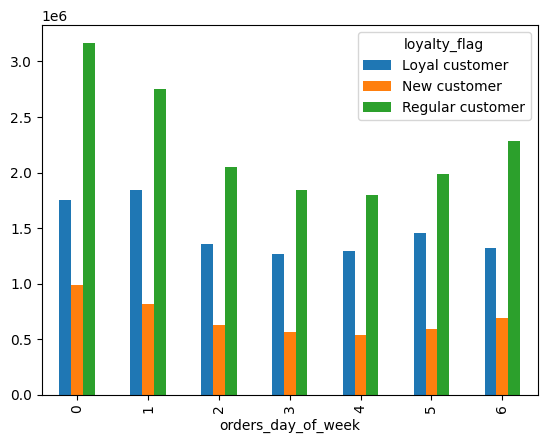

In [192]:
loyalty_orders.plot.bar()

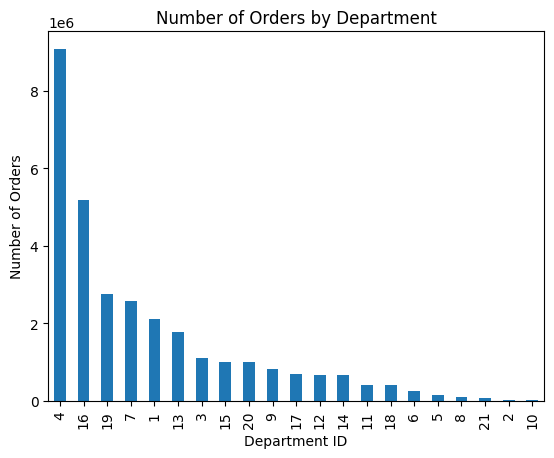

In [178]:
bar_dep = orders_all_included['department_id'].value_counts().plot.bar()
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Department')
plt.show()